In [1]:
# importing required libraries and modules, libraries and modules are added on need basis
import pandas as pd
import numpy as np

#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

import pickle

In [2]:
# viewing the function/methods
print(dir("read_csv"))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [3]:
# loading the data set
df = pd.read_csv("hr employee attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# seeing total number of rows and columns
df.shape

(1470, 35)

In [5]:
# viewing top 5 rows of the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# viewing all the columns in the data set
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# checking the data type of all columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# finding missing data
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# finding total no.of missing data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# checking how many unique values does the "Atrrition" column have
df_unique = len(pd.unique(df["Attrition"]))
print(df_unique)

2


In [11]:
# finding the total count of the said unique values
df["Attrition"].value_counts()

# in this, the total number of "yes" and "no" values

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [12]:
# finding the statistical values of the data set
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# no missing or wrong  values so far, so no need for data cleaning

In [14]:
# creating visualisations
# exploring the data using histograms

<Axes: xlabel='Age', ylabel='Count'>

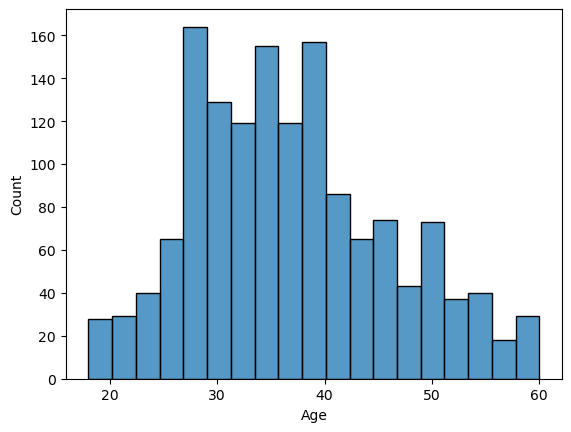

In [15]:
sns.histplot(df["Age"])

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

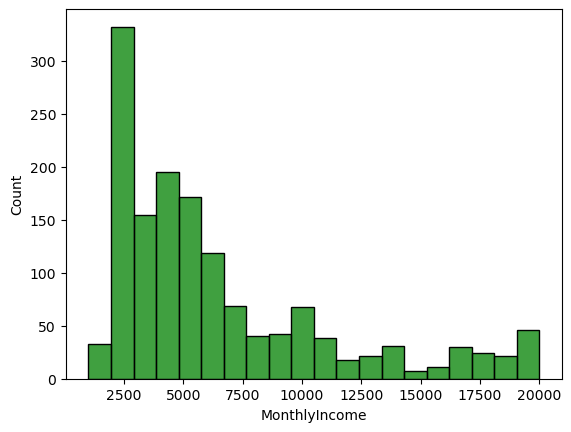

In [16]:
sns.histplot(df["MonthlyIncome"], color = "green")

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

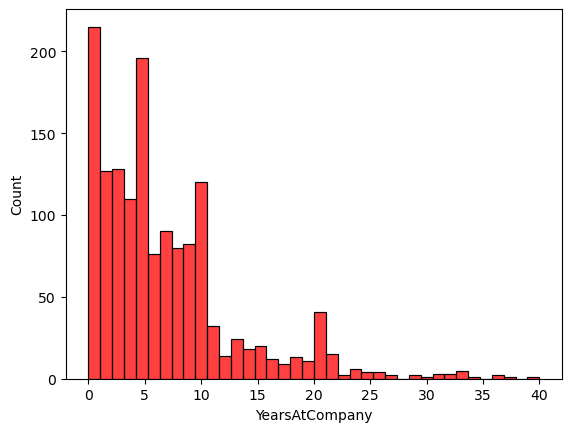

In [17]:
sns.histplot(df["YearsAtCompany"], color = "red")

In [18]:
# now comparing these plots with attrition

<Axes: xlabel='Age', ylabel='Attrition'>

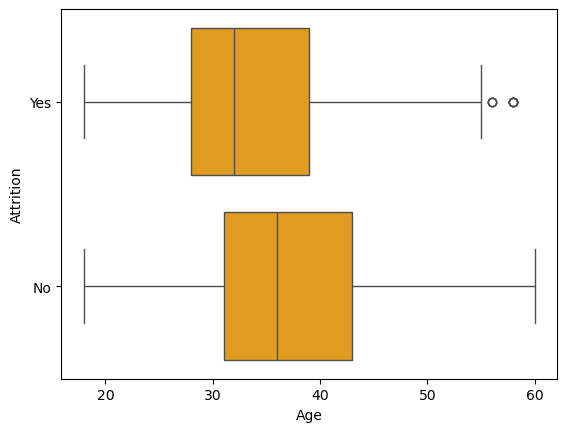

In [19]:
sns.boxplot(df, y = "Attrition", x = "Age", color = "orange")

<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

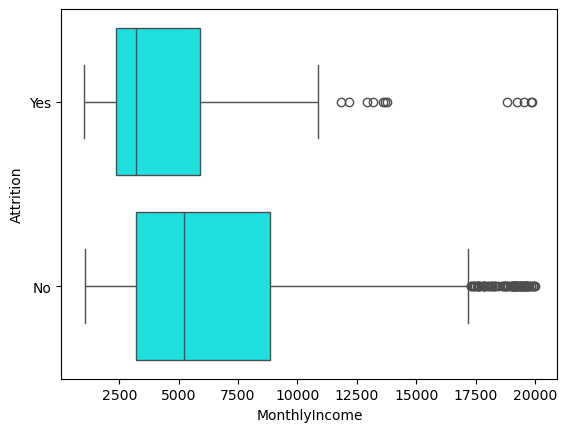

In [20]:
sns.boxplot(df, y = "Attrition", x = "MonthlyIncome", color = "cyan")

<Axes: xlabel='YearsAtCompany', ylabel='Attrition'>

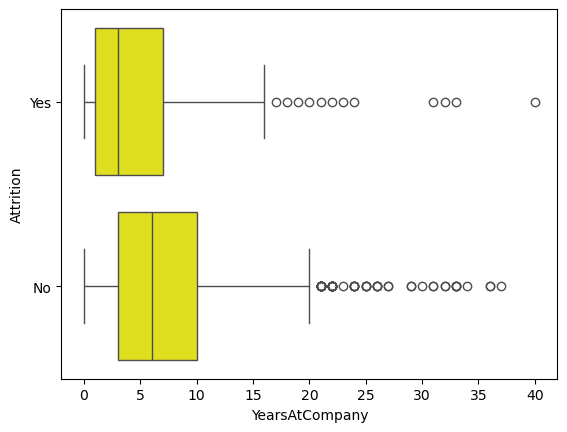

In [21]:
sns.boxplot(df, y = "Attrition", x = "YearsAtCompany", color = "yellow")

In [22]:
# comparing employees who work overtime with attrition

<Axes: xlabel='OverTime', ylabel='count'>

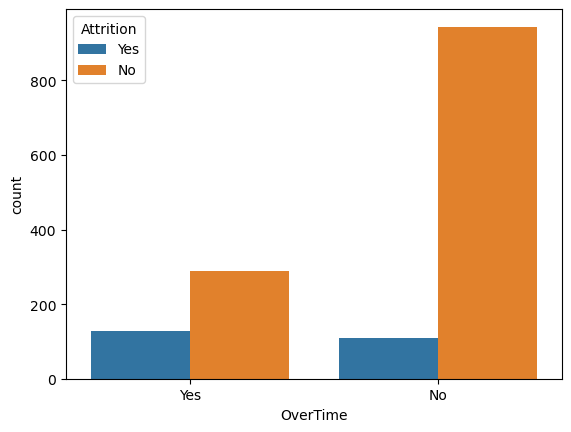

In [23]:
sns.countplot(df, x = "OverTime", hue ="Attrition")

<Axes: xlabel='JobSatisfaction', ylabel='count'>

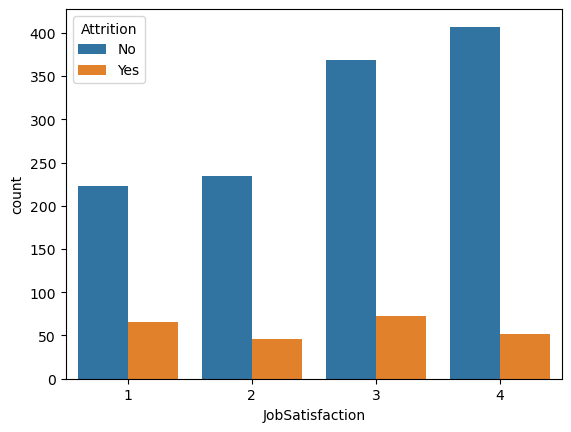

In [24]:
# checking job-satisfaction
sns.countplot(df, x = "JobSatisfaction", hue ="Attrition")

In [25]:
# grouping the data by job satisfaction
df.groupby("JobSatisfaction")['Attrition'].value_counts()

JobSatisfaction  Attrition
1                No           223
                 Yes           66
2                No           234
                 Yes           46
3                No           369
                 Yes           73
4                No           407
                 Yes           52
Name: count, dtype: int64

In [26]:
df_group = df.groupby("JobSatisfaction")['Attrition'].value_counts(normalize = True)
df_group

JobSatisfaction  Attrition
1                No           0.771626
                 Yes          0.228374
2                No           0.835714
                 Yes          0.164286
3                No           0.834842
                 Yes          0.165158
4                No           0.886710
                 Yes          0.113290
Name: proportion, dtype: float64

In [27]:
df_group*100

JobSatisfaction  Attrition
1                No           77.162630
                 Yes          22.837370
2                No           83.571429
                 Yes          16.428571
3                No           83.484163
                 Yes          16.515837
4                No           88.671024
                 Yes          11.328976
Name: proportion, dtype: float64

In [28]:
"""
upon exploring the data
i observed that employees who fall in the following category tend to leave the most:
young employees
low income
less number of years worked
more overtime
less job satisfaction

any employee who falls in either of these categories, tend to leave more i.e higher attrtion
"""

'\nupon exploring the data\ni observed that employees who fall in the following category tend to leave the most:\nyoung employees\nlow income\nless number of years worked\nmore overtime\nless job satisfaction\n\nany employee who falls in either of these categories, tend to leave more i.e higher attrtion\n'

In [29]:
# feature engineering and preparation

""" 1st step to drop useless columns, using describe() method i have determined that the columns employeecount,standardhours and over18 are useless, as they have only 1 unique value,
they have 0 variance meaning their values are same which cant be used to predict anything,
they dont add any additional or unique value which can waste the computatio
"""

' 1st step to drop useless columns, using describe() method i have determined that the columns employeecount,standardhours and over18 are useless, as they have only 1 unique value,\nthey have 0 variance meaning their values are same which cant be used to predict anything,\nthey dont add any additional or unique value which can waste the computatio\n'

In [30]:
# dropping useless columns
df.drop(columns =[ "EmployeeCount","StandardHours","Over18"])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [31]:
# encoding attrition column values from yes,no to 0,1
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [32]:
# counting the encoded values
df["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [33]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [34]:
# encoding gender as 1,0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [35]:
# encoding overtime as 1,0

df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

In [36]:
# encoding over18 as 1,0

df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0})

In [37]:
# checking their types
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                       int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [38]:
# one hot encoding categorical columns

In [39]:
# creating a separate dataframe df2 which stores df dataframe values
df2 = df
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [40]:
# as said above, one-hot encoding categorical values
df2 = pd.get_dummies(df2, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])

In [41]:
# verifying if encoding is successfull or not
df2.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
Over18                               int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkin

In [42]:
# viewing shape
df2.shape

(1470, 54)

In [43]:
# dropping redundant columns
df2 = df2.drop(columns = ["EmployeeCount","StandardHours", "Over18","EmployeeNumber"])

In [44]:
# creating and applying machine learning models

In [45]:
# splitting the data as x and y
x = df2.drop("Attrition", axis = 1)                                              # this is used to predict, axis=1 is used to drop one column,these are features basically inputs
y = df2["Attrition"]                                                         # this is getting predicted these are target basically outputs

In [46]:
x.shape
y.shape


(1470,)

In [47]:
# splitting data into train(70%) and test(30%)
# test_size = 0.3 here is for 30% of the data
# random_state = 42 is used so that data split is always the same and not random, we can use any number using 66 is not necessary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 66) 

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 49)
(441, 49)
(1029,)
(441,)


In [49]:
# normalizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
# creating model
# using logistic regression model
model = LogisticRegression(max_iter = 1000, class_weight='balanced')
model.fit(x_train_scaled, y_train)
y_pred_scaled = model.predict(x_test_scaled)

In [51]:
print(accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

0.7596371882086168
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       369
           1       0.38      0.76      0.51        72

    accuracy                           0.76       441
   macro avg       0.66      0.76      0.68       441
weighted avg       0.85      0.76      0.79       441



In [52]:
model.coef_[0]

array([-2.61590671e-01, -1.21250323e-01,  3.36531263e-01, -7.87183428e-04,
       -4.89640736e-01,  8.75990376e-02,  7.51014372e-03, -2.72454102e-01,
        2.98645012e-01, -4.82341675e-01, -1.91844570e-02,  1.01438224e-01,
        4.50028227e-01,  8.69948826e-01, -2.50672052e-01,  1.26723281e-01,
       -3.73752695e-01, -1.47311588e-01, -7.27720524e-01, -2.35114108e-01,
       -3.09193009e-01,  9.75700044e-01, -5.33594785e-01,  6.68178614e-01,
       -6.64339279e-01, -3.24506496e-01,  2.31663503e-01,  2.23916560e-02,
       -5.12938467e-01,  3.10196411e-01, -1.07560403e-01,  1.14592643e-01,
       -1.49251851e-01, -6.12006819e-02, -4.36942080e-02,  7.56325010e-02,
        2.77407447e-01, -3.80893827e-01,  6.67018395e-01,  2.29066162e-01,
       -3.04198319e-01, -2.38345132e-01, -5.51207893e-01, -1.44018034e-01,
        3.53164597e-01,  3.82281159e-01, -3.22496312e-01, -4.91799039e-02,
        3.43359459e-01])

In [53]:
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'Jo

In [54]:
# getting feature importance
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
})

In [55]:
feature_importance['Abs_Coef'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values('Abs_Coef', ascending=False).head(10)

,Feature,Coefficient,Abs_Coef
21,YearsAtCompany,0.975700,0.975700
13,OverTime,0.869949,0.869949
18,TotalWorkingYears,-0.727721,0.727721
23,YearsSinceLastPromotion,0.668179,0.668179
38,JobRole_Human Resources,0.667018,0.667018
24,YearsWithCurrManager,-0.664339,0.664339
42,JobRole_Research Director,-0.551208,0.551208
22,YearsInCurrentRole,-0.533595,0.533595
28,Department_Human Resources,-0.512938,0.512938
4,EnvironmentSatisfaction,-0.489641,0.489641


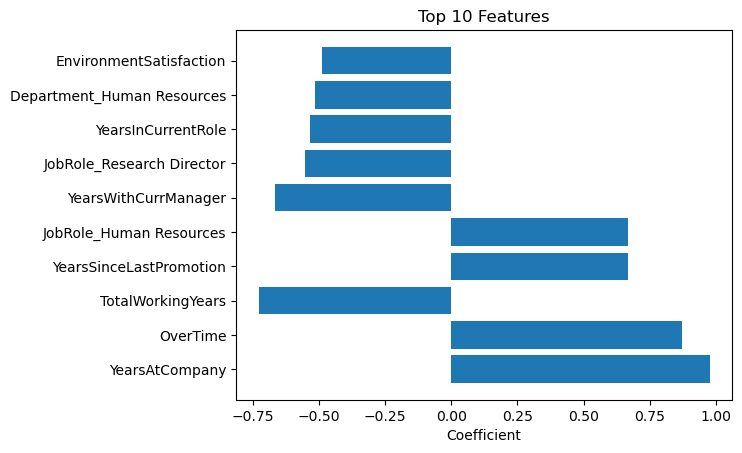

In [56]:
# plotting these features
top_features = feature_importance.sort_values('Abs_Coef', ascending=False).head(10)
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Top 10 Features')
plt.show()

In [57]:
cm = confusion_matrix(y_test, y_pred_scaled)
print(cm)

[[280  89]
 [ 17  55]]


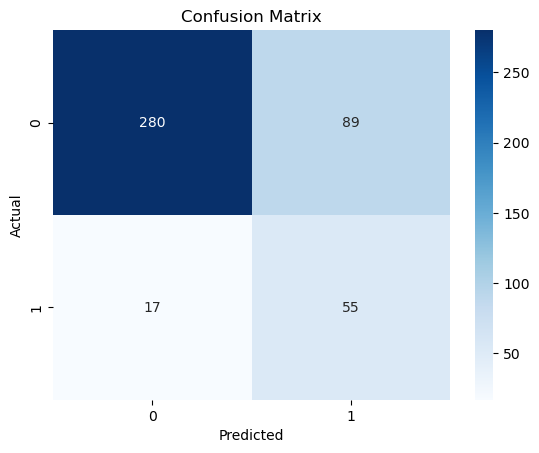

In [58]:
cm = confusion_matrix(y_test, y_pred_scaled)

# Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

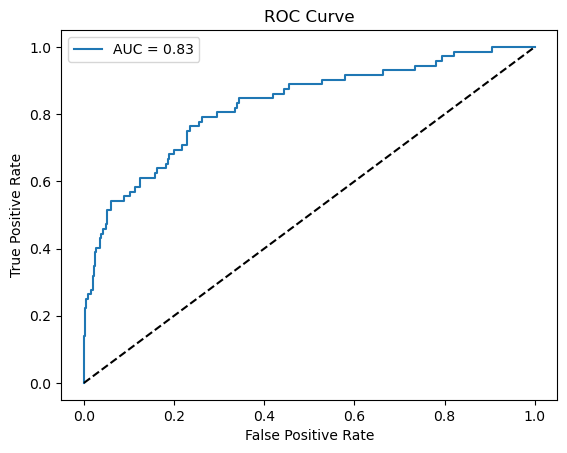

In [59]:
#roc curve
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [60]:
# trying a different model
# using random forest

In [61]:
# imported RandomForestClassifier from sklearn
rf_model = RandomForestClassifier(random_state = 66,class_weight='balanced' )
rf_model.fit(x_train_scaled, y_train)
rf_pred_scaled = rf_model.predict(x_test_scaled)

In [62]:
print(accuracy_score(y_test, rf_pred_scaled))
print(classification_report(y_test,rf_pred_scaled))

0.8503401360544217
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       369
           1       0.75      0.12      0.21        72

    accuracy                           0.85       441
   macro avg       0.80      0.56      0.57       441
weighted avg       0.84      0.85      0.80       441



# randomforest and gradient boosting models they didnt show a better recall when compared to logistic regression model
# i tried using confusion matrix concepts since the model was predicting leaving yes as more which was wrong, basically the model was predicting out of 10, 7 left the company
# instead of 4 that actually left(this is an example analogy)
# using confusion matrix reduces that error

# i also used aoc/ruc to predict the model quality for this problem, the closer it gets the 1 the better the model quality, in this case i achieved 0.83

In [65]:
# Save model
with open('attrition_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# save features
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(x.columns.tolist(), f)

# Get defaults from training data
defaults = {}
for col in x.columns:
    if df2[col].dtype in ['int64', 'float64']:
        defaults[col] = df2[col].median()
    else:
        defaults[col] = df2[col].mode()[0]

# Save defaults
with open('defaults.pkl', 'wb') as f:
    pickle.dump(defaults, f)